# Student Programmer Analysis Prediction by using Machine Learning Algorithm

# Package Importing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets Reading

In [3]:
Input_Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Student_Role_Analaysis_ML/Code/Programmer_datasets.csv")
Input_Data

,ID,GENDER,BATCH_CODE,MODE,NUMPY_79,PERCENTAGE_NUMPY,PANDAS_76,PERCENTAGE_PANDAS,PROGRAMMING_190,PERCENTAGE_PROGRAMMING,PYTHON_51,PERCENTAGE_PYTHON,OUTPUT,TARGET
0,1,M,DW1,WD,34,43.037975,51,68.918919,0,0.000000,32,62.745098,43.675498,0
1,2,M,DW3,WD,76,96.202532,70,92.105263,90,47.368421,51,100.000000,83.919054,1
2,3,M,DW4,WD,64,81.012658,64,84.210526,60,31.578947,46,90.196078,71.749553,0
3,4,M,DW7,WD,71,89.873418,62,81.578947,40,21.052632,41,80.392157,68.224288,0
4,5,M,DW9,WD,63,79.746835,62,81.578947,120,63.157895,44,86.274510,77.689547,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,F,D45,WE,64,83.116883,57,77.027027,110,57.894737,36,70.588235,72.156721,0
264,265,F,D45,WE,60,77.922078,66,89.189189,10,5.263158,42,82.352941,63.681842,0
265,266,F,D45,WE,66,85.714286,65,87.837838,140,73.684211,33,64.705882,77.985554,0
266,267,M,D46,WE,68,88.311688,61,82.432432,0,0.000000,49,96.078431,66.705638,0


# Datasets PreProcessing

In [4]:
Input_Data.head()

,ID,GENDER,BATCH_CODE,MODE,NUMPY_79,PERCENTAGE_NUMPY,PANDAS_76,PERCENTAGE_PANDAS,PROGRAMMING_190,PERCENTAGE_PROGRAMMING,PYTHON_51,PERCENTAGE_PYTHON,OUTPUT,TARGET
0,1,M,DW1,WD,34,43.037975,51,68.918919,0,0.000000,32,62.745098,43.675498,0
1,2,M,DW3,WD,76,96.202532,70,92.105263,90,47.368421,51,100.000000,83.919054,1
2,3,M,DW4,WD,64,81.012658,64,84.210526,60,31.578947,46,90.196078,71.749553,0
3,4,M,DW7,WD,71,89.873418,62,81.578947,40,21.052632,41,80.392157,68.224288,0
4,5,M,DW9,WD,63,79.746835,62,81.578947,120,63.157895,44,86.274510,77.689547,0


In [5]:
Input_Data.tail()

,ID,GENDER,BATCH_CODE,MODE,NUMPY_79,PERCENTAGE_NUMPY,PANDAS_76,PERCENTAGE_PANDAS,PROGRAMMING_190,PERCENTAGE_PROGRAMMING,PYTHON_51,PERCENTAGE_PYTHON,OUTPUT,TARGET
263,264,F,D45,WE,64,83.116883,57,77.027027,110,57.894737,36,70.588235,72.156721,0
264,265,F,D45,WE,60,77.922078,66,89.189189,10,5.263158,42,82.352941,63.681842,0
265,266,F,D45,WE,66,85.714286,65,87.837838,140,73.684211,33,64.705882,77.985554,0
266,267,M,D46,WE,68,88.311688,61,82.432432,0,0.000000,49,96.078431,66.705638,0
267,268,F,D49,WE,77,97.468354,73,96.052632,0,0.000000,42,82.352941,68.968482,0


In [6]:
Input_Data.shape

(268, 14)

In [7]:
Input_Data.describe()

,ID,NUMPY_79,PERCENTAGE_NUMPY,PANDAS_76,PERCENTAGE_PANDAS,PROGRAMMING_190,PERCENTAGE_PROGRAMMING,PYTHON_51,PERCENTAGE_PYTHON,OUTPUT,TARGET
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,134.500000,61.402985,77.913692,58.522388,78.387402,71.791045,37.784760,38.608209,75.702371,67.447056,0.182836
std,77.509139,10.944956,13.748023,9.832848,13.010546,52.056592,27.398206,6.130253,12.020105,12.308333,0.387255
min,1.000000,0.000000,0.000000,27.000000,36.486486,0.000000,0.000000,18.000000,35.294118,33.234958,0.000000
25%,67.750000,56.000000,70.886076,54.000000,72.181721,30.000000,15.789474,36.000000,70.588235,60.094159,0.000000
50%,134.500000,63.000000,80.133158,61.000000,81.330014,70.000000,36.842105,40.000000,78.431373,68.112343,0.000000
75%,201.250000,69.000000,87.341772,66.000000,88.157895,110.000000,57.894737,43.000000,84.313725,76.802280,0.000000
max,268.000000,78.000000,98.734177,76.000000,100.000000,170.000000,89.473684,51.000000,100.000000,90.491840,1.000000


In [8]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      268 non-null    int64  
 1   GENDER                  268 non-null    object 
 2   BATCH_CODE              268 non-null    object 
 3   MODE                    268 non-null    object 
 4   NUMPY_79                268 non-null    int64  
 5   PERCENTAGE_NUMPY        268 non-null    float64
 6   PANDAS_76               268 non-null    int64  
 7   PERCENTAGE_PANDAS       268 non-null    float64
 8   PROGRAMMING_190         268 non-null    int64  
 9   PERCENTAGE_PROGRAMMING  268 non-null    float64
 10  PYTHON_51               268 non-null    int64  
 11  PERCENTAGE_PYTHON       268 non-null    float64
 12  OUTPUT                  268 non-null    float64
 13  TARGET                  268 non-null    int64  
dtypes: float64(5), int64(6), object(3)
memory 

In [10]:
Input_Data.value_counts("GENDER")

GENDER
F    146
M    122
dtype: int64

In [11]:
Input_Data.value_counts("BATCH_CODE")

BATCH_CODE
DW24     20
DW25     17
DW28     16
DW27     16
DW23     16
DW22     14
DW19     13
DW13      8
D42       8
DW21      8
DW11      7
DW18      7
DW33      6
DW26      6
D27       6
DW15      6
DW9       5
D30       5
DW20      4
DW16      4
D20       4
D43       4
DW14      4
D45       4
DW17      3
DW32      3
DW12      3
D14AB     3
D19       3
D17       3
D25       3
D37       3
D31       3
D32       2
D21       2
D22       2
D24       2
D16       2
D26       2
D33       2
D39       2
D40       2
D18       2
DW31      2
DW3       1
DW4       1
DW7       1
DW10      1
DW29      1
D34       1
D41       1
D44       1
D46       1
D49       1
DW1       1
dtype: int64

In [12]:
Input_Data.value_counts("MODE")

MODE
WD    194
WE     74
dtype: int64

In [13]:
Input_Data.value_counts("NUMPY_79")

NUMPY_79
64    16
61    14
68    13
60    13
71    12
67    12
66    12
72    12
73    11
75    10
62     9
65     9
59     9
69     9
63     8
48     7
57     7
53     6
58     6
51     6
52     6
70     5
77     5
56     5
55     5
50     4
54     4
47     3
46     3
74     3
76     3
49     2
42     2
40     2
37     2
34     2
43     2
0      1
12     1
45     1
41     1
38     1
35     1
33     1
24     1
78     1
dtype: int64

In [14]:
Input_Data.value_counts("PERCENTAGE_NUMPY")

PERCENTAGE_NUMPY
81.012658    14
77.215190    14
84.810127    12
75.949367    12
86.075949    12
             ..
67.532468     1
68.831169     1
23.529412     1
76.623377     1
98.734177     1
Length: 62, dtype: int64

In [15]:
Input_Data.value_counts("PANDAS_76")

PANDAS_76
62    18
64    17
55    17
68    16
70    16
61    14
66    14
65    12
58    11
60     8
50     8
57     8
69     8
72     7
54     7
48     7
56     6
63     6
59     6
49     6
67     6
40     6
53     5
51     4
43     4
45     3
42     3
52     2
44     2
71     2
38     2
36     2
33     2
31     2
73     1
74     1
27     1
29     1
47     1
46     1
41     1
39     1
37     1
30     1
76     1
dtype: int64

In [16]:
Input_Data.value_counts("PERCENTAGE_PANDAS")

PERCENTAGE_PANDAS
74.324324    12
89.473684    10
83.783784    10
78.378378    10
87.837838    10
             ..
65.789474     1
71.052632     1
73.684211     1
39.189189     1
36.486486     1
Length: 69, dtype: int64

In [17]:
Input_Data.value_counts("PROGRAMMING_190")

PROGRAMMING_190
0      45
50     28
70     24
140    21
60     15
170    15
80     14
130    14
40     13
110    13
90     12
30     11
100    11
10     10
120     9
20      6
150     5
160     2
dtype: int64

In [18]:
Input_Data.value_counts("PERCENTAGE_PROGRAMMING")

PERCENTAGE_PROGRAMMING
0.000000     45
26.315789    28
36.842105    24
73.684211    21
31.578947    15
89.473684    15
42.105263    14
68.421053    14
21.052632    13
57.894737    13
47.368421    12
15.789474    11
52.631579    11
5.263158     10
63.157895     9
10.526316     6
78.947368     5
84.210526     2
dtype: int64

In [19]:
Input_Data.value_counts("PYTHON_51")

PYTHON_51
42    28
39    25
41    24
40    22
43    18
44    17
46    15
37    13
45    12
38    12
36    10
35    10
33     9
34     8
30     6
32     6
29     4
22     4
26     3
25     3
49     3
31     2
20     2
48     2
27     2
21     2
50     1
18     1
28     1
24     1
23     1
51     1
dtype: int64

In [20]:
Input_Data.value_counts("PERCENTAGE_PYTHON")

PERCENTAGE_PYTHON
82.352941     28
76.470588     25
80.392157     24
78.431373     22
84.313725     18
86.274510     17
90.196078     15
72.549020     13
88.235294     12
74.509804     12
70.588235     10
68.627451     10
64.705882      9
66.666667      8
58.823529      6
62.745098      6
56.862745      4
43.137255      4
50.980392      3
49.019608      3
96.078431      3
60.784314      2
39.215686      2
94.117647      2
52.941176      2
41.176471      2
98.039216      1
35.294118      1
54.901961      1
47.058824      1
45.098039      1
100.000000     1
dtype: int64

In [21]:
Input_Data.value_counts("OUTPUT")

OUTPUT
33.234958    1
75.092837    1
72.755745    1
72.822574    1
72.891602    1
            ..
63.661551    1
63.681842    1
63.743593    1
64.005940    1
90.491840    1
Length: 268, dtype: int64

In [22]:
Input_Data.value_counts("TARGET")

TARGET
0    219
1     49
dtype: int64

In [25]:
Duplicated_Values_Student_Programmer = Input_Data[Input_Data.duplicated()]
print("\n {}".format(Duplicated_Values_Student_Programmer))


 Empty DataFrame
Columns: [ID, GENDER, BATCH_CODE, MODE, NUMPY_79, PERCENTAGE_NUMPY, PANDAS_76, PERCENTAGE_PANDAS, PROGRAMMING_190, PERCENTAGE_PROGRAMMING, PYTHON_51, PERCENTAGE_PYTHON, OUTPUT, TARGET]
Index: []


In [33]:
Input_Data.isna().sum()

ID                        0
GENDER                    0
BATCH_CODE                0
MODE                      0
NUMPY_79                  0
PERCENTAGE_NUMPY          0
PANDAS_76                 0
PERCENTAGE_PANDAS         0
PROGRAMMING_190           0
PERCENTAGE_PROGRAMMING    0
PYTHON_51                 0
PERCENTAGE_PYTHON         0
OUTPUT                    0
TARGET                    0
dtype: int64

# Data Visualization : Exploratory Data Analysis

<Axes: >

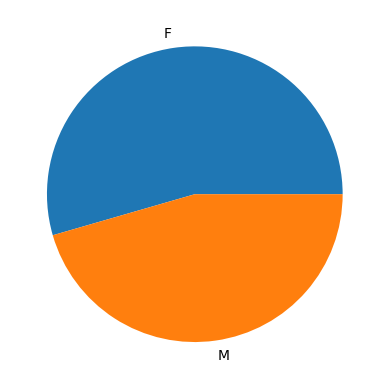

In [26]:
Input_Data.groupby('GENDER').size().plot(kind='pie')

<Axes: >

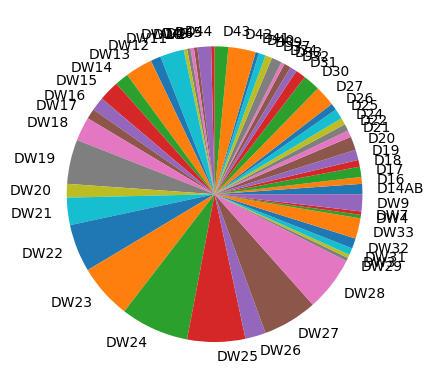

In [27]:
Input_Data.groupby('BATCH_CODE').size().plot(kind='pie')

<Axes: >

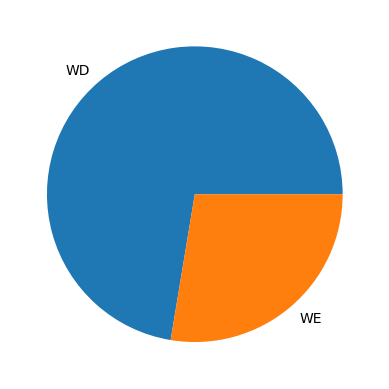

In [28]:
Input_Data.groupby('MODE').size().plot(kind='pie')

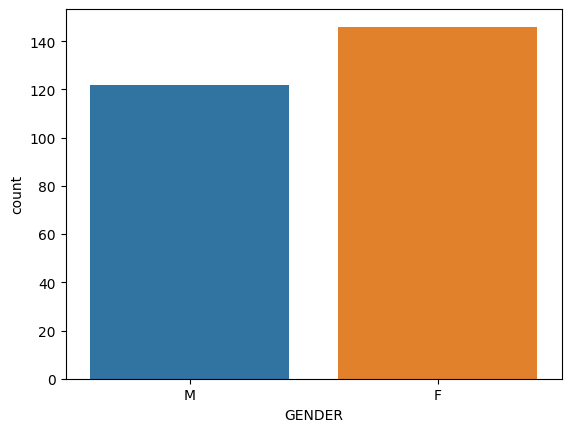

In [29]:
# count plot on single categorical variable
sns.countplot(x ='GENDER', data = Input_Data)
 
# Show the plot
plt.show()

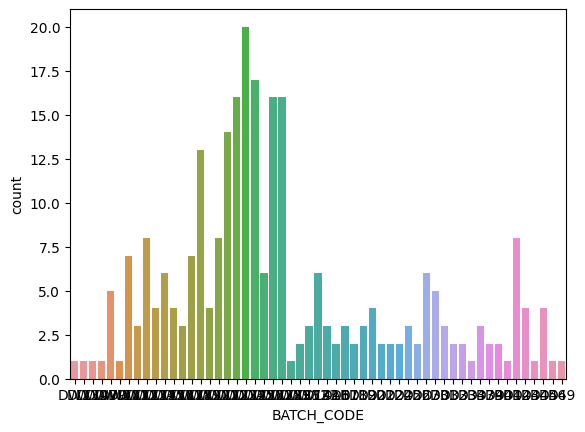

In [30]:
# count plot on single categorical variable
sns.countplot(x ='BATCH_CODE', data = Input_Data)
 
# Show the plot
plt.show()

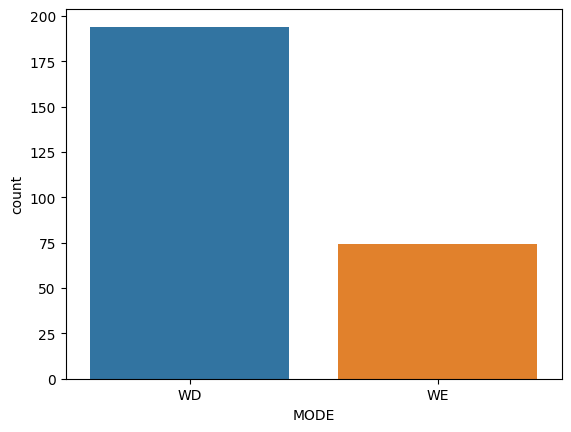

In [31]:
# count plot on single categorical variable
sns.countplot(x ='MODE', data = Input_Data)
 
# Show the plot
plt.show()

In [32]:
# !pip install pandas_profiling

<ipython-input-34-9caae1988db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PERCENTAGE_NUMPY'], kde=False)


<Axes: xlabel='PERCENTAGE_NUMPY'>

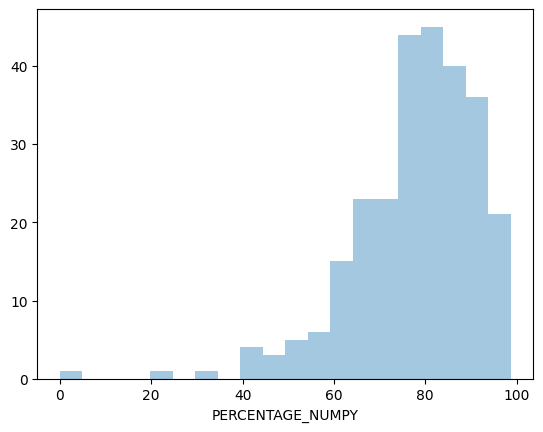

In [34]:
sns.distplot(a=Input_Data['PERCENTAGE_NUMPY'], kde=False)

<ipython-input-35-5826281c86cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PANDAS_76'], kde=False)


<Axes: xlabel='PANDAS_76'>

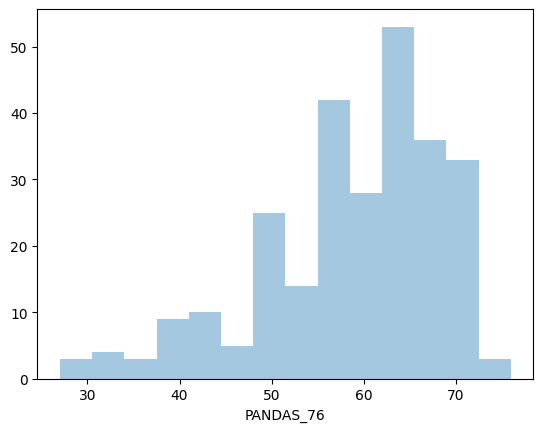

In [35]:
sns.distplot(a=Input_Data['PANDAS_76'], kde=False)

<ipython-input-36-b025b7938c29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PERCENTAGE_PANDAS'], kde=False)


<Axes: xlabel='PERCENTAGE_PANDAS'>

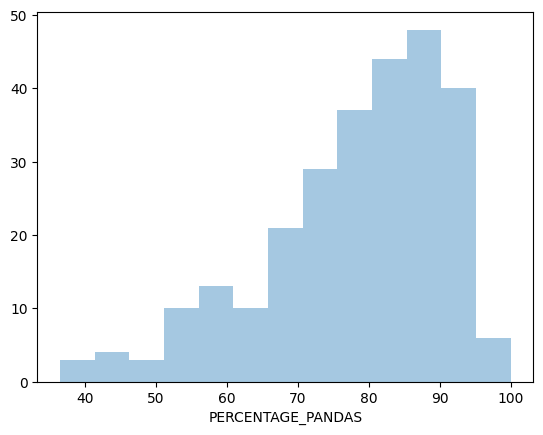

In [36]:
sns.distplot(a=Input_Data['PERCENTAGE_PANDAS'], kde=False)

<ipython-input-37-ece893ac5167>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PROGRAMMING_190'], kde=False)


<Axes: xlabel='PROGRAMMING_190'>

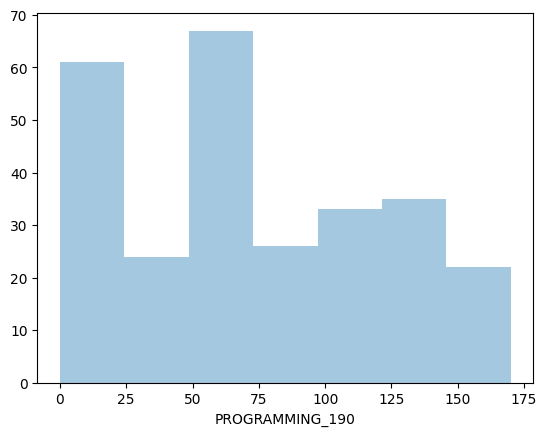

In [37]:
sns.distplot(a=Input_Data['PROGRAMMING_190'], kde=False)

<ipython-input-38-61dda1734820>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PERCENTAGE_PROGRAMMING'], kde=False)


<Axes: xlabel='PERCENTAGE_PROGRAMMING'>

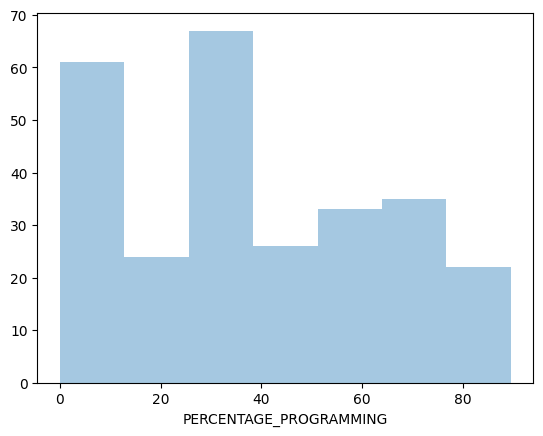

In [38]:
sns.distplot(a=Input_Data['PERCENTAGE_PROGRAMMING'], kde=False)

<ipython-input-39-f08e813cdd22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PYTHON_51'], kde=False)


<Axes: xlabel='PYTHON_51'>

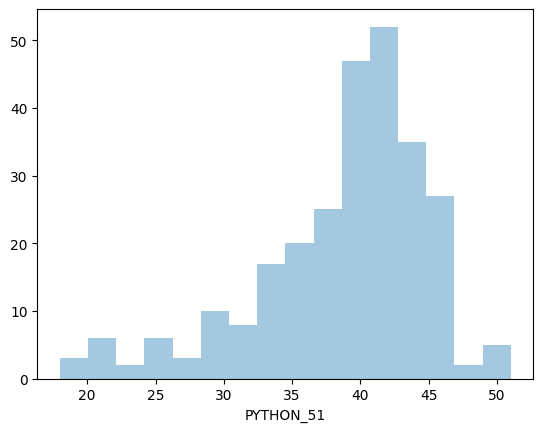

In [39]:
sns.distplot(a=Input_Data['PYTHON_51'], kde=False)

<ipython-input-40-da35ca075ec0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['PERCENTAGE_PYTHON'], kde=False)


<Axes: xlabel='PERCENTAGE_PYTHON'>

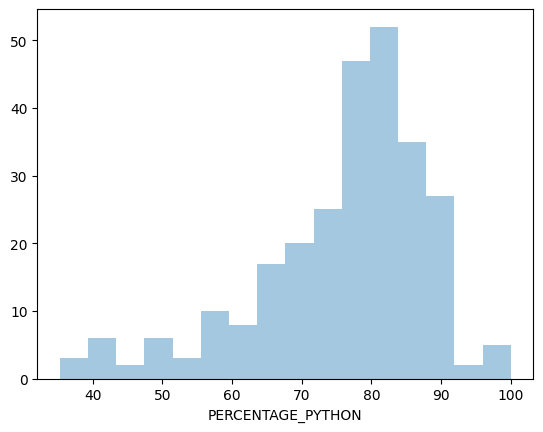

In [40]:
sns.distplot(a=Input_Data['PERCENTAGE_PYTHON'], kde=False)

<ipython-input-41-17154ae4265e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['OUTPUT'], kde=False)


<Axes: xlabel='OUTPUT'>

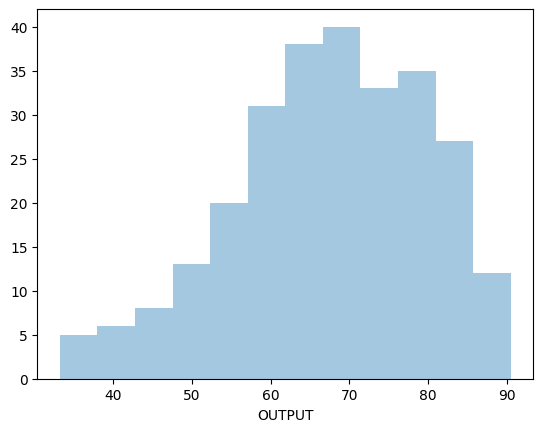

In [41]:
sns.distplot(a=Input_Data['OUTPUT'], kde=False)

<ipython-input-42-beda3be4be7d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PERCENTAGE_NUMPY'], shade=True)


<Axes: xlabel='PERCENTAGE_NUMPY', ylabel='Density'>

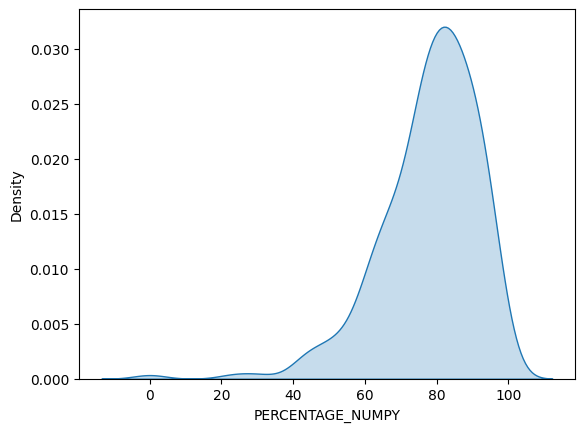

In [42]:
sns.kdeplot(data=Input_Data['PERCENTAGE_NUMPY'], shade=True)

<ipython-input-43-d7abecfdcf05>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PANDAS_76'], shade=True)


<Axes: xlabel='PANDAS_76', ylabel='Density'>

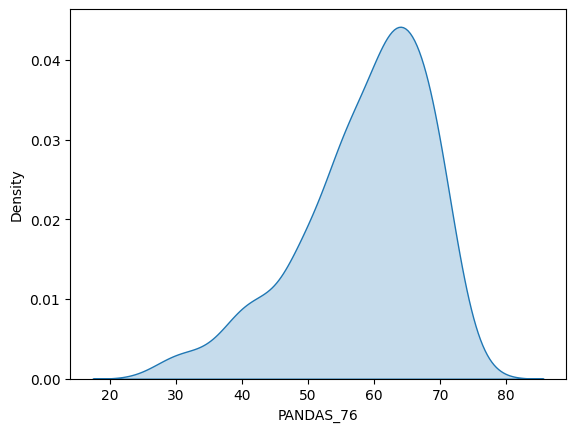

In [43]:
sns.kdeplot(data=Input_Data['PANDAS_76'], shade=True)

<ipython-input-44-88f28c831b8c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PERCENTAGE_PANDAS'], shade=True)


<Axes: xlabel='PERCENTAGE_PANDAS', ylabel='Density'>

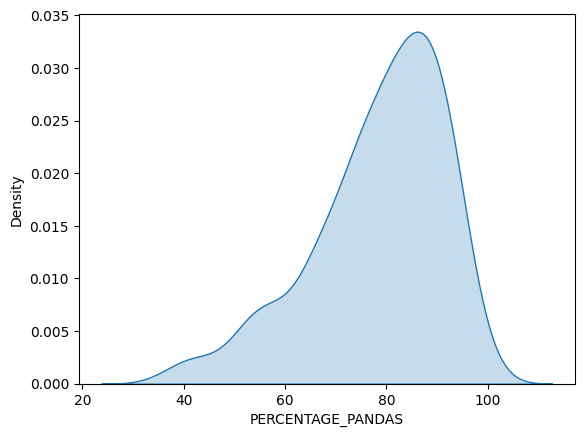

In [44]:
sns.kdeplot(data=Input_Data['PERCENTAGE_PANDAS'], shade=True)

<ipython-input-45-c61eae677134>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PROGRAMMING_190'], shade=True)


<Axes: xlabel='PROGRAMMING_190', ylabel='Density'>

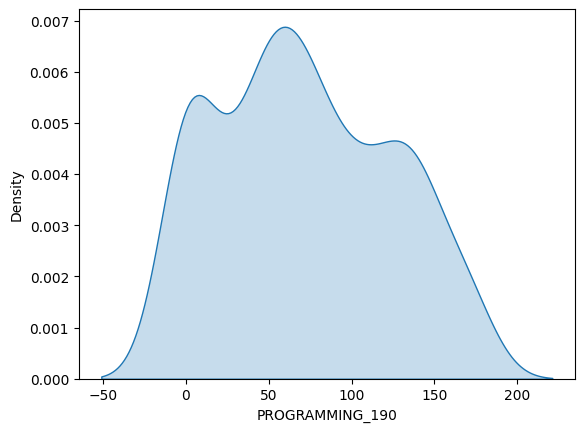

In [45]:
sns.kdeplot(data=Input_Data['PROGRAMMING_190'], shade=True)

<ipython-input-46-534291125dc3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PERCENTAGE_PROGRAMMING'], shade=True)


<Axes: xlabel='PERCENTAGE_PROGRAMMING', ylabel='Density'>

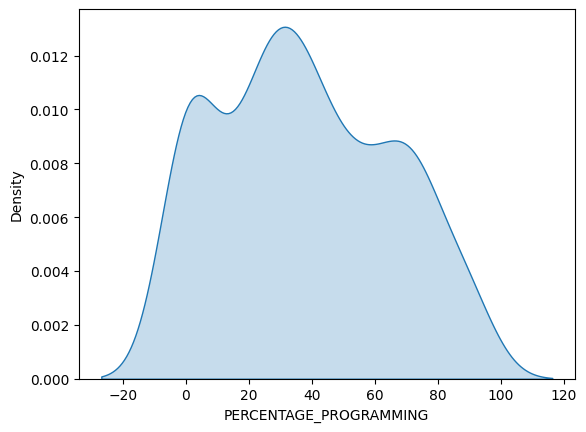

In [46]:
sns.kdeplot(data=Input_Data['PERCENTAGE_PROGRAMMING'], shade=True)

<ipython-input-47-3e2f4ecdadce>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PYTHON_51'], shade=True)


<Axes: xlabel='PYTHON_51', ylabel='Density'>

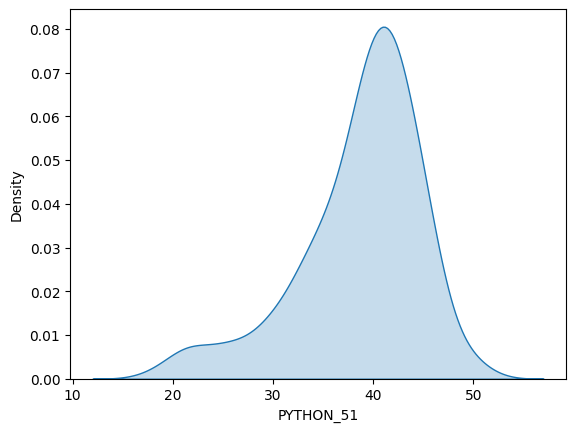

In [47]:
sns.kdeplot(data=Input_Data['PYTHON_51'], shade=True)

<ipython-input-48-e22d36215eec>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['PERCENTAGE_PYTHON'], shade=True)


<Axes: xlabel='PERCENTAGE_PYTHON', ylabel='Density'>

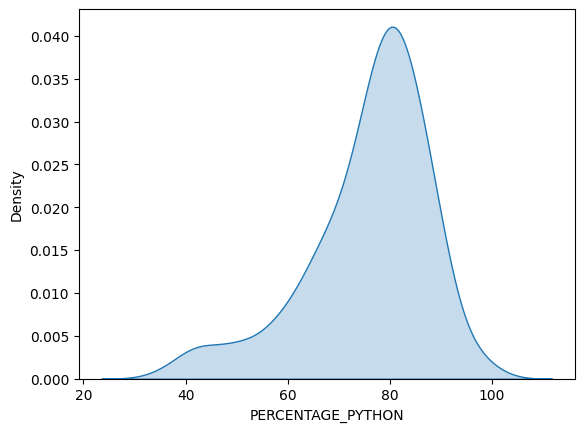

In [48]:
sns.kdeplot(data=Input_Data['PERCENTAGE_PYTHON'], shade=True)

<ipython-input-49-86ccd8170588>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Input_Data['OUTPUT'], shade=True)


<Axes: xlabel='OUTPUT', ylabel='Density'>

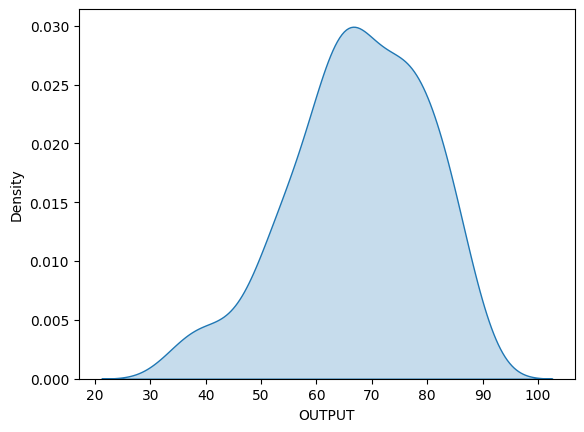

In [49]:
sns.kdeplot(data=Input_Data['OUTPUT'], shade=True)

<ipython-input-51-d77fb73282b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_Output = Input_Data.corr()


<Axes: >

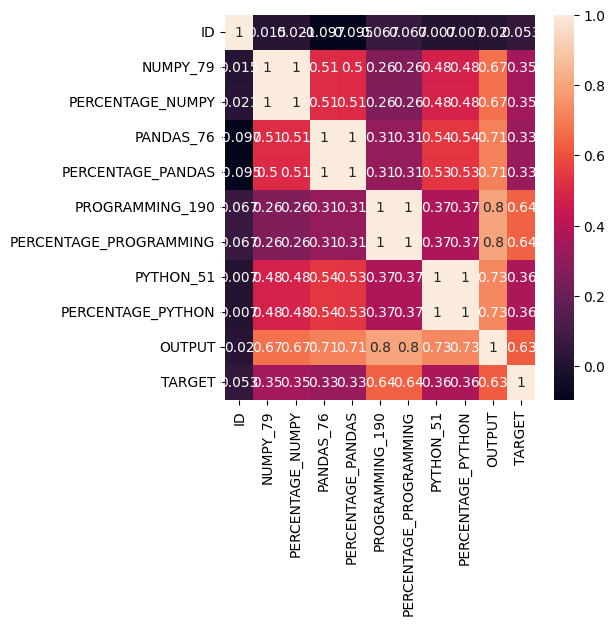

In [51]:
import seaborn as sns
Correlation_Output = Input_Data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(Correlation_Output, annot = True)

In [52]:
# from pandas_profiling import ProfileReport
# profile_charu_raghav_sadhana = ProfileReport(Input_Data, title="Report for our Project", explorative=True)
# profile_charu_raghav_sadhana.to_notebook_iframe()

# Aligning the Data into Proper Format

In [53]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Input_Data['GENDER']= label_encoder.fit_transform(Input_Data['GENDER'])
Input_Data['BATCH_CODE']= label_encoder.fit_transform(Input_Data['BATCH_CODE'])
Input_Data['MODE']= label_encoder.fit_transform(Input_Data['MODE'])


In [54]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      268 non-null    int64  
 1   GENDER                  268 non-null    int64  
 2   BATCH_CODE              268 non-null    int64  
 3   MODE                    268 non-null    int64  
 4   NUMPY_79                268 non-null    int64  
 5   PERCENTAGE_NUMPY        268 non-null    float64
 6   PANDAS_76               268 non-null    int64  
 7   PERCENTAGE_PANDAS       268 non-null    float64
 8   PROGRAMMING_190         268 non-null    int64  
 9   PERCENTAGE_PROGRAMMING  268 non-null    float64
 10  PYTHON_51               268 non-null    int64  
 11  PERCENTAGE_PYTHON       268 non-null    float64
 12  OUTPUT                  268 non-null    float64
 13  TARGET                  268 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 29.4

# Model Selection

In [55]:
Input = Input_Data.drop('TARGET',axis = 1)
Input

,ID,GENDER,BATCH_CODE,MODE,NUMPY_79,PERCENTAGE_NUMPY,PANDAS_76,PERCENTAGE_PANDAS,PROGRAMMING_190,PERCENTAGE_PROGRAMMING,PYTHON_51,PERCENTAGE_PYTHON,OUTPUT
0,1,1,27,0,34,43.037975,51,68.918919,0,0.000000,32,62.745098,43.675498
1,2,1,48,0,76,96.202532,70,92.105263,90,47.368421,51,100.000000,83.919054
2,3,1,52,0,64,81.012658,64,84.210526,60,31.578947,46,90.196078,71.749553
3,4,1,53,0,71,89.873418,62,81.578947,40,21.052632,41,80.392157,68.224288
4,5,1,54,0,63,79.746835,62,81.578947,120,63.157895,44,86.274510,77.689547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,0,24,1,64,83.116883,57,77.027027,110,57.894737,36,70.588235,72.156721
264,265,0,24,1,60,77.922078,66,89.189189,10,5.263158,42,82.352941,63.681842
265,266,0,24,1,66,85.714286,65,87.837838,140,73.684211,33,64.705882,77.985554
266,267,1,25,1,68,88.311688,61,82.432432,0,0.000000,49,96.078431,66.705638


In [56]:
Output = Input_Data['TARGET']
Output

0      0
1      1
2      0
3      0
4      0
      ..
263    0
264    0
265    0
266    0
267    0
Name: TARGET, Length: 268, dtype: int64

# Model Implementation

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, train_size = 0.7, random_state=200)

# Machine Learning Algorithm

# Support Vector Machine Algorithm

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVM_Model = SVC(kernel='rbf',random_state=0)
SVM_Model.fit(X_train, y_train)
Prediction_SVM = SVM_Model.predict(X_test)
Accuracy_SVM = accuracy_score(y_test, Prediction_SVM)
print("Model Accuracy of Support Vector Machine Algorithm:",Accuracy_SVM)

Model Accuracy of Support Vector Machine Algorithm: 0.9629629629629629


# Classification Report of SVM Algorithm

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CR_SVM = classification_report(y_test, Prediction_SVM)
print("Classification Report:",)
print (CR_SVM)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.87      0.93      0.90        14

    accuracy                           0.96        81
   macro avg       0.93      0.95      0.94        81
weighted avg       0.96      0.96      0.96        81



# Confusion Matrix of SVM Algorithm

Confusion Matrix:
[[65  2]
 [ 1 13]]


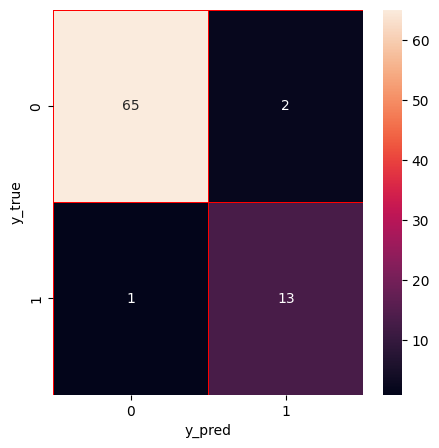

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_SVM = confusion_matrix(y_test, Prediction_SVM)
print("Confusion Matrix:")
print(CM_SVM)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(CM_SVM,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# KNN Algorithm

In [65]:
from sklearn.neighbors import KNeighborsClassifier
Model_KNN = KNeighborsClassifier()
Model_KNN.fit(X_train, y_train)
Prediction_KNN = Model_KNN.predict(X_test)
Accuracy_KNN= Model_KNN.score(X_test,Prediction_KNN)

print("Model Accuracy of KNN Algorithm:",Accuracy_KNN)

Model Accuracy of KNN Algorithm: 1.0


# Classification Report of KNN Algorithm

In [66]:
CR_KNN= classification_report(y_test, Prediction_KNN)
print("Classification Report:",)
print (CR_KNN)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.81      0.93      0.87        14

    accuracy                           0.95        81
   macro avg       0.90      0.94      0.92        81
weighted avg       0.95      0.95      0.95        81



# Confusion Matrix of KNN ALgorithm

Confusion Matrix:
[[64  3]
 [ 1 13]]


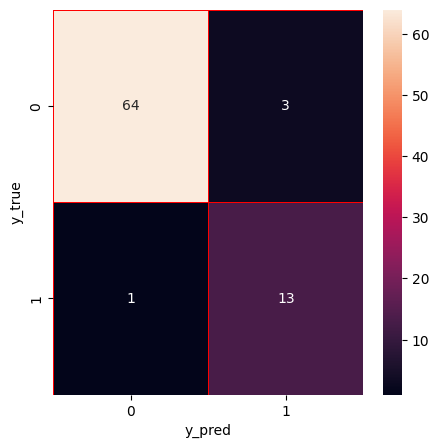

In [67]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
CM_KNN = confusion_matrix(y_test, Prediction_KNN)  
print("Confusion Matrix:")
print(CM_KNN)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(CM_KNN,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Extreme Gradient Boosting Machine Algorithm(Xgbm)

In [75]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [76]:
Model_XGBM = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
Model_XGBM.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
Prediction_XGBM = Model_XGBM.predict(X_test)
Accuracy_XGBM = metrics.r2_score(y_test, Prediction_XGBM)
print('Accuracy of XGBM:', Accuracy_XGBM)

Accuracy of XGBM: 0.9999502339666254


# Comparison of All the Algorithm

Text(0.5, 1.0, 'Model Accuracy of all the Algorithm')

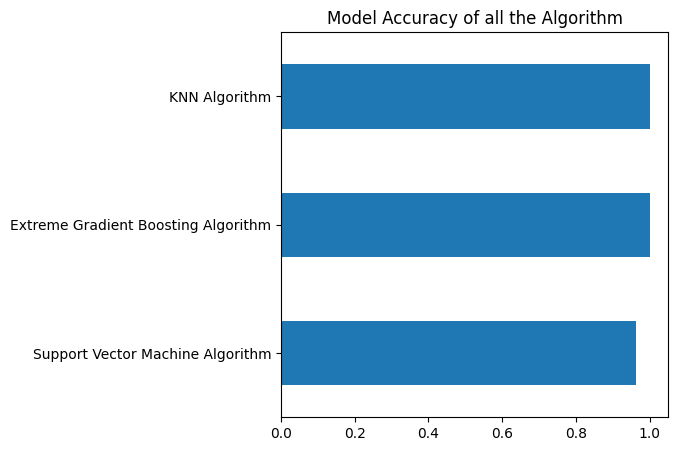

In [81]:
Model_Accuracy= pd.Series(data=[Accuracy_SVM,Accuracy_KNN,Accuracy_XGBM], 
                index=['Support Vector Machine Algorithm','KNN Algorithm', 'Extreme Gradient Boosting Algorithm'])
fig= plt.figure(figsize=(5,5))
Model_Accuracy.sort_values().plot.barh()
plt.title('Model Accuracy of all the Algorithm')